In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

<span style="color:blue">Each group of students (of no more than 4) will collect daily data for at least five years on the following instruments: at least six stocks, two corporate bonds of your choice, and two commodities of your choice. Use assets traded on US exchanges and markets. You are free to use mutual funds or Exchnage-Traded Funds instead of individual assets. Also, collect the risk-free rate of your choice and the S&P 500 index. The project must be executed using EXCEL. You should perform, at least, the following tasks for the completion of the project along with the suitable explanations (both narrative/verbal and mathematical): 
</span>


In [9]:
# given a list of tickers, this function returns a DataFrame with the Adj Close for the assets specified 
# and the period specified
def get_data(tickers_list, period,interval = '1mo'):
    data = pd.DataFrame(columns=tickers_list)

    for ticker in tickers_list:
    #     data[ticker] = yf.download(ticker, '2018-1-1', '2019-1-1')['Adj Close']
        t = yf.Ticker(ticker)
        temp = t.history(period=period,interval=interval)
        data[ticker] = temp.Close
    
    return data

In [102]:
# instrument selection
stocks = ['AAPL', 'TSLA']
bonds = ['PONAX']
commodities = ['EIPCX','CMCAX']

rf = ['select this']
sp500 = ['^GSPC']

assets = stocks + bonds + commodities + sp500
print(assets)

['AAPL', 'TSLA', 'PONAX', 'EIPCX', 'CMCAX', '^GSPC']


In [103]:
# fetch daily historical prices (Adj Close) from Yahoo! Finance
data = get_data(assets, '5y').dropna()
# benchmark = get_data(sp500, '5y').dropna()

In [104]:
# benchmark = get_data(sp500, '5y').dropna()

In [176]:
# show the DataFrame
data.head()

,AAPL,TSLA,PONAX,EIPCX,CMCAX,^GSPC
Date,,,,,,
2015-02-01,118.03,203.34,9.39,5.54,5.1660,2104.50
2015-03-01,114.78,188.77,9.44,5.30,4.8991,2067.89
2015-04-01,115.44,226.05,9.52,5.59,5.2176,2085.51
2015-05-01,120.18,250.80,9.59,5.44,5.0282,2107.39
2015-06-01,116.19,268.26,9.53,5.43,5.0713,2063.11


In [177]:
returns = data.pct_change()[1:]

## Question 1
 <span style="color:blue">Decide on the allocation of your budget to each of the above instruments. Rationalize your choice based on your own investment philosophy. You should fill out a risk tolerance questionnaire and supply both the questionnaire and its suggested allocation (in the project’s Appendix). In your discussion, please explain the choice of your investment vehicles and their significance in your portfolio. Label this as your investment policy statement (IPS). </span>

 <span style="color:red">**SEE REPORT**</span>

## Question 2
<span style="color:blue">Outline your investment objectives, constraints and strategies and discuss the relative importance of risk and return in your investment decision making.</span>

 <span style="color:red">**SEE REPORT**</span>

## Question 3
<span style="color:blue">Provide a preliminary discussion of the effects of the short investment horizon in your decision(s) and diversification strategy.</span>

 <span style="color:red">**SEE REPORT**</span>

## Question 4
<span style="color:blue">Compute the descriptive statistics for each instrument. Explain each metric you computed from the perspective of the investor. Provide graphs as well. </span>

Descriptive statistics are broken down into measures of central tendency and measures of variability (spread). Measures of central tendency include the mean, median, and mode, while measures of variability include the standard deviation, variance, the minimum and maximum variables, and the kurtosis and skewness.

**descriptive statisics on price or returns?**

In [107]:
# mean
# median
# mode -> decided not to measure since a distribution can have multiple modes 

# standard deviation
# variance
# minimum
# maximum
# kurtosis
# skewness

In [128]:
q4 = ['mean','median','std','var','min','max','kurtosis','skewness']
q5 = ['alpha','beta','r-squared']

In [129]:
df = pd.DataFrame(columns= q4+q5,index=assets)

In [135]:
import statistics
import scipy.stats

for i in range(len(assets)):
    # fetch data for asset i
    l = data[assets[i]].tolist()
    # compute descriptive statistics for instrument i
    df.iloc[i]['mean'] = statistics.mean(l)
    df.iloc[i]['median'] = statistics.median(l)
    df.iloc[i]['std'] = statistics.stdev(l)
    df.iloc[i]['var'] = statistics.variance(l)
    df.iloc[i]['min'] = min(l)
    df.iloc[i]['max'] = max(l)
    df.iloc[i]['kurtosis'] = scipy.stats.kurtosis(l)
    df.iloc[i]['skewness'] = scipy.stats.skew(l)
  
# print df
df.iloc[:,:-len(q5)].T

,AAPL,TSLA,PONAX,EIPCX,CMCAX,^GSPC
mean,153.69,275.929,10.6173,5.03133,4.50059,2480.99
median,147.81,265.45,10.9,5.06,4.4922,2470.98
std,52.5007,68.0767,0.819125,0.285434,0.313463,376.639
var,2756.32,4634.44,0.670966,0.0814728,0.0982593,141857
min,88.07,185.16,9.27,4.29,3.7712,1920.03
max,319.23,572.2,12.09,5.59,5.2176,3325.54
kurtosis,0.750829,4.15189,-1.25354,0.378461,0.0958699,-1.07796
skewness,0.986825,1.44001,-0.121489,-0.561974,-0.0123499,0.253135


In [110]:
df.to_latex(index=True)

'\\begin{tabular}{lllllllll}\n\\toprule\n{} &     mean &   median &       std &        var &      min &      max &   kurtosis &   skewness \\\\\n\\midrule\nAAPL  &   153.69 &   147.81 &   52.5007 &    2756.32 &    88.07 &   319.23 &   0.750829 &   0.986825 \\\\\nTSLA  &  275.929 &   265.45 &   68.0767 &    4634.44 &   185.16 &    572.2 &    4.15189 &    1.44001 \\\\\nPONAX &  10.6173 &     10.9 &  0.819125 &   0.670966 &     9.27 &    12.09 &   -1.25354 &  -0.121489 \\\\\nEIPCX &  5.03133 &     5.06 &  0.285434 &  0.0814728 &     4.29 &     5.59 &   0.378461 &  -0.561974 \\\\\nCMCAX &  4.50059 &   4.4922 &  0.313463 &  0.0982593 &   3.7712 &   5.2176 &  0.0958699 & -0.0123499 \\\\\n\\textasciicircum GSPC &  2480.99 &  2470.98 &   376.639 &     141857 &  1920.03 &  3325.54 &   -1.07796 &   0.253135 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Question 5
<span style="color:blue">Compute additional metrics for the assets such as the correlation and covariance matrices, for the entire and two subperiods (of your own choosing), if needed. Interpret your findings. Also, compute each fund’s alpha, beta, R-square. Interpret your findings from the perspective of the investor.</span>

In [111]:
returns.corr()

,AAPL,TSLA,PONAX,EIPCX,CMCAX,^GSPC
AAPL,1.000000,0.277025,0.338798,0.176568,0.225448,0.572262
TSLA,0.277025,1.000000,0.019622,0.190810,0.129397,0.200466
PONAX,0.338798,0.019622,1.000000,0.190861,0.221589,0.322858
EIPCX,0.176568,0.190810,0.190861,1.000000,0.933386,0.365991
CMCAX,0.225448,0.129397,0.221589,0.933386,1.000000,0.347865
^GSPC,0.572262,0.200466,0.322858,0.365991,0.347865,1.000000


(6.0, 0.0)

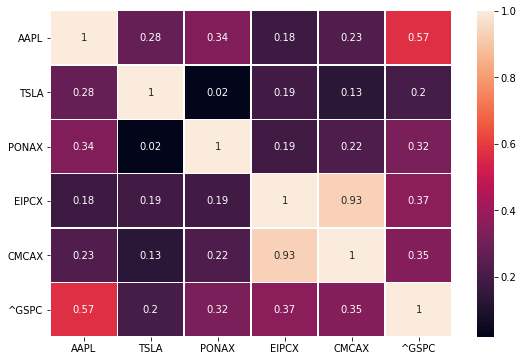

In [112]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(returns.corr(), annot=True,  linewidths=.5, ax=ax)
plt.yticks(rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [113]:
# sns.pairplot(data)

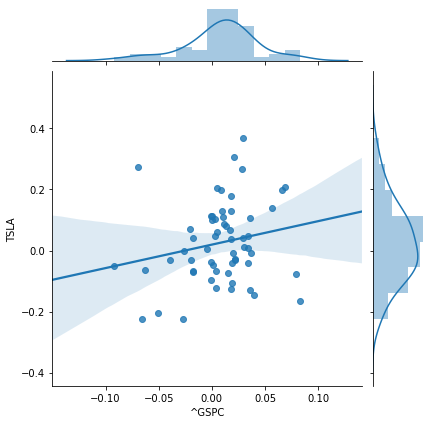

In [124]:
sns.jointplot('^GSPC', 'TSLA', returns, kind='reg')

In [117]:
y = returns[assets[0]].values
x = returns[assets[-1]].values

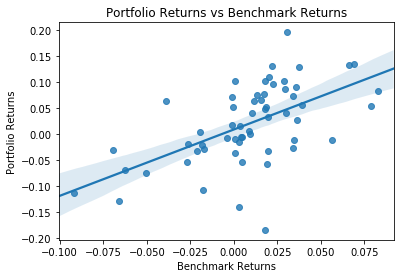

In [118]:
sns.regplot(x, y)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [119]:
(beta, alpha) = scipy.stats.linregress(x,y)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha, 4))
# alpha


# beta
# R-squared

The portfolio beta is 1.2771
The portfolio alpha is 0.0092


In [138]:
x = returns[assets[-1]].values
for i in range(len(assets)):
    # fetch data for asset i
    y = returns[assets[i]].values
    # compute alpha, beta, r-squared for instrument i
    (beta, alpha, r_value) = scipy.stats.linregress(x,y)[0:3]
    df.iloc[i]['alpha'] = alpha
    df.iloc[i]['beta'] = beta
    df.iloc[i]['r-squared'] = r_value ** 2

In [141]:
df.iloc[:-1,len(q4):].T

,AAPL,TSLA,PONAX,EIPCX,CMCAX
alpha,0.00918598,0.0193633,0.00368793,-0.00355647,-0.00501304
beta,1.27706,0.769261,0.0761644,0.364352,0.410409
r-squared,0.327484,0.0401864,0.104237,0.133949,0.12101


## Question 6
<span style="color:blue">Calculate the return/risk of your risky portfolio. Explain each step in your analysis. You must use EXCEL’s mmult functions for this part of the analysis.</span>

## Question 7
<span style="color:blue">Derive and graph the Capital Allocation Line. Graph the Efficient Frontier with your available investment instruments (assets) and superimpose your CAL. Discuss the various options you may have and finalize your optimal point.</span>

In [195]:
# two implementations of CAL. second one more efficient. Both need fixing

In [145]:
returns.columns[:-1]

Index(['AAPL', 'TSLA', 'PONAX', 'EIPCX', 'CMCAX'], dtype='object')

Text(0, 0.5, 'daily returns')

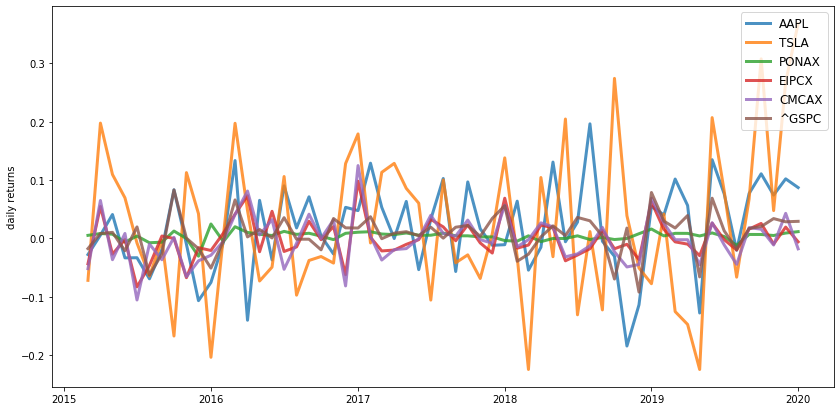

In [147]:
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [161]:
np.random.seed(42)
num_ports = 2000
# all_weights = np.zeros((num_ports, len(returns.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
ret = returns.iloc[:-1]


for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(6))
    weights = weights/np.sum(weights)
    
    # Save weights
#     all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

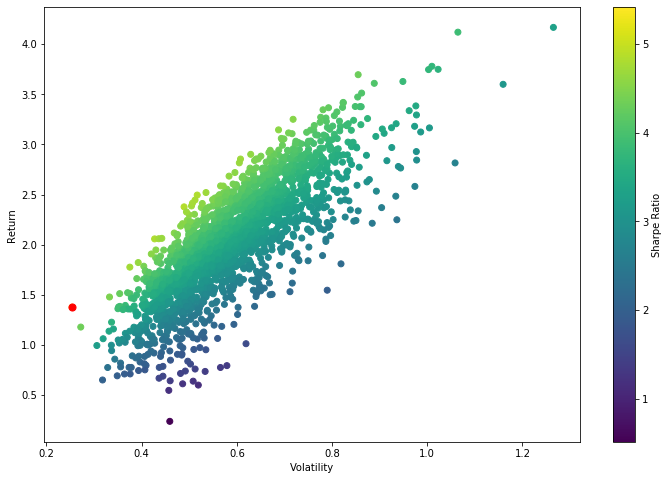

In [162]:
max_sr_vol = vol_arr[sharpe_arr.argmax()]
max_sr_ret = ret_arr[sharpe_arr.argmax()]


plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

## Question 8
<span style="color:blue">Keep a track record of the macro- and microeconomic events that influenced your assets/portfolio and offer explanations for some of them, if you deem necessary. Your explanations should also be accompanied with some quantitative verification.</span>

## Question 9
<span style="color:blue">Measure and evaluate your overall portfolio’s performance and compare it with the passive investment strategy. In this step, you should apply EXCEL’s Solver to evaluate several possible outcomes (in terms of risk and return) and explain each outcome. In that endeavor, compute the various performance measures we have learned. Decide on the best outcome for you. Discuss.</span>

## Question 10
<span style="color:blue">Finally, perform a critical evaluation of the project. In other words, what did this project accomplish for you regarding the study and (this simple) application of investment theories and strategies? What would be the implications of constructing, managing and evaluating such a portfolio for your portfolio? </span>

In [174]:
returns_daily.iloc[:,:-1].head()

,AAPL,TSLA,PONAX,EIPCX
Date,,,,
2015-03-01,-0.027535,-0.071653,0.005325,-0.043321
2015-04-01,0.005750,0.197489,0.008475,0.054717
2015-05-01,0.041060,0.109489,0.007353,-0.026834
2015-06-01,-0.033200,0.069617,-0.006257,-0.001838
2015-07-01,-0.032963,-0.007866,0.004197,-0.082873


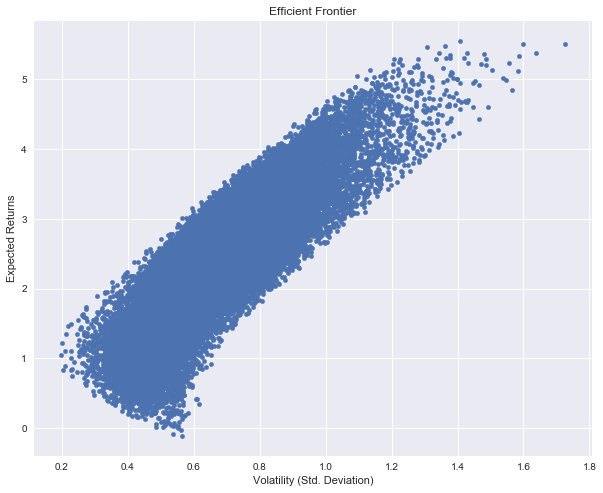

In [192]:
# calculate daily and annual returns of the stocks
returns_daily = returns.iloc[:,:-1]
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(assets)-1
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    rets = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(rets)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

selected = assets[:-1]
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [193]:
sharpe_arr = [port_returns[i] / port_volatility[i] for i in range(len(port_returns))]

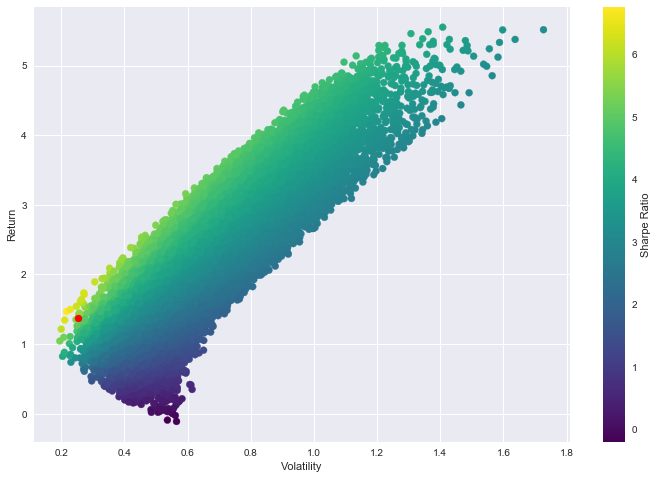

In [194]:
# max_sr_vol = vol_arr[sharpe_arr.argmax()]
# max_sr_ret = ret_arr[sharpe_arr.argmax()]


plt.figure(figsize=(12,8))
plt.scatter(port_volatility, port_returns, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()